# **Data Analytics : Exercises**
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2024-07-14
---

Reference: https://www.kaggle.com/datasets/carrie1/ecommerce-data

**ความหมายแต่ละคอลัมน์**

* **⁠InvoiceNo**: คือ หมายเลขใบเสร็จ
* **StockCode**: คือ รหัสสินค้า
* **Description**: คือ ชื่อสินค้า
* **Quantity**: คือ จำนวนสินค้านั้นที่ซื้อในใบเสร็จ
* **InvoiceDate**: คือ วันที่/เวลา ของใบเสนอราคา
* **UnitPrice**: คือ ราคาสินค้าต่อชิ้น
* **CustomerID**: คือ รหัสลูกค้า
* **Country**: คือ ประเทศของลูกค้า



---



## Import

In [2]:
import numpy as np
import pandas as pd

## Examples
ตัวอย่างสำหรับเริ่มต้น

In [3]:
CSV_PATH = "https://rathachai.github.io/DA-LAB/datasets/ecom-dat.csv"

In [4]:
df = pd.read_csv(CSV_PATH)

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom
...,...,...,...,...,...,...,...,...
46850,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom
46851,581581,23561,SET OF 6 RIBBONS PARTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom
46852,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,12/9/2011 12:20,1.65,17581.0,United Kingdom
46853,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,12/9/2011 12:21,2.08,17581.0,United Kingdom


In [6]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85


---
### (Ex-01) จงหาลูกค้าที่ซื้อสินค้าบ่อยที่สุด 5 คนแรก

In [8]:
dfg = df.groupby(['CustomerID'])[['InvoiceNo']].nunique().sort_values('InvoiceNo', ascending=False)
dfg.head(5)

,InvoiceNo
CustomerID,
14911.0,197
14606.0,93
13408.0,60
13767.0,37
16133.0,32


---
### (Ex-02) จงหาความถี่การใช้จ่ายตามรายชั่วโมง

In [9]:
df['InvDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00


In [10]:
df['hr'] = df['InvDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate,hr
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00,9
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00,9
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00,9


In [11]:
df_by_hr = df.groupby('hr')[['InvoiceNo']].nunique()
df_by_hr

,InvoiceNo
hr,
7,2
8,59
9,180
10,291
11,262
12,354
13,307
14,264
15,212


<Axes: xlabel='hr'>

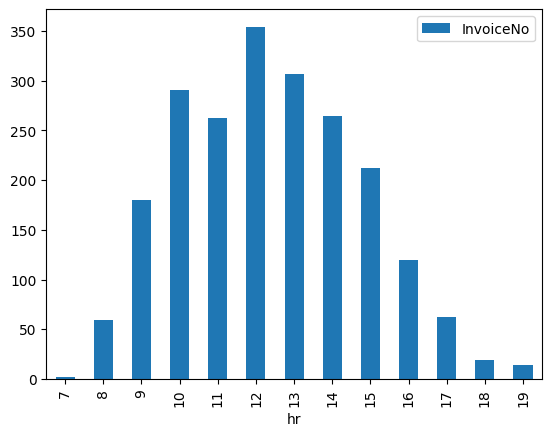

In [12]:
df_by_hr.plot.bar()



---



---


## Basic Exercises
โจทย์อย่างง่าย

### (B-01) จงนับจำนวน Invoice

In [15]:
df['InvoiceNo'].nunique()

2146

---
### (B-02) จงนับจำนวนลูกค้า

In [16]:
df['CustomerID'].nunique()

486

---
### (B-03) จงนับจำนวนสินค้า

hint
- description

In [17]:
df['Description'].nunique()

3202

---
### (B-04) มีประเทศใดบ้าง

In [20]:
df['Country'].unique()

array(['United Kingdom', 'Germany', 'EIRE', 'Japan', 'France',
       'Channel Islands', 'Denmark', 'Cyprus', 'Austria', 'Switzerland',
       'United Arab Emirates', 'Czech Republic', 'Spain', 'Italy',
       'European Community', 'Canada', 'Finland', 'Norway', 'Portugal'],
      dtype=object)

---
### (B-05) จงคำนวณจำนวนรายได้ทั้งหมด

In [21]:
df['Total'].sum()

753421.941

---
### (B-06) จงหาค่าใช้จ่ายเฉลี่ยต่อการซื้อ

In [22]:
df['Total'].sum()

68492.90372727273

---
### (B-07) จงหาค่าใช้จ่ายเฉลี่ยต่อลูกค้า

In [33]:
df.groupby('InvoiceNo')['Total'].sum().mean()

351.08198555452003



---



---


## Advanced Exercises

โจทย์ยากขึ้น

### (Q-01) ลูกค้าจากประเทศใดมีการใช้จ่ายสูงที่สุด

hint:
- groupby country
- sum total
- เรียงจากมากไปน้อย
- เลือกแถวแรก

In [46]:
df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(1).to_frame()

,Total
Country,
United Kingdom,540707.491


---
### (Q-02) Invoice ใด มีจำนวนชิ้นสินค้าสูงที่สุด

In [57]:
df.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending=False).head(1).to_frame()

,Quantity
InvoiceNo,
567183,2673


---
### (Q-03) Invoice ใด มีค่าใช้จ่ายสูงที่สุด

In [61]:
df.groupby('InvoiceNo')['Total'].sum().sort_values(ascending=False).head(1).to_frame()

,Total
InvoiceNo,
567183,3829.09


---
### (Q-04) Invoice ใด มีชนิดสินค้ามากที่สุด

hint
- nunique

In [63]:
df.groupby('InvoiceNo')['Description'].nunique().sort_values(ascending=False).head(1).to_frame()

,Description
InvoiceNo,
567183,385


---
### (Q-05) ลูกค้าใดซื้อสินค้าบ่อยที่สุด

In [66]:
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(1).to_frame()

,InvoiceNo
CustomerID,
14911.0,197


---
### (Q-06) จงแสดงจำนวนลูกค้าในแต่ละประเทศด้วยกราฟแทงแนวนอน

hint
- nunique
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

<Axes: ylabel='Country'>

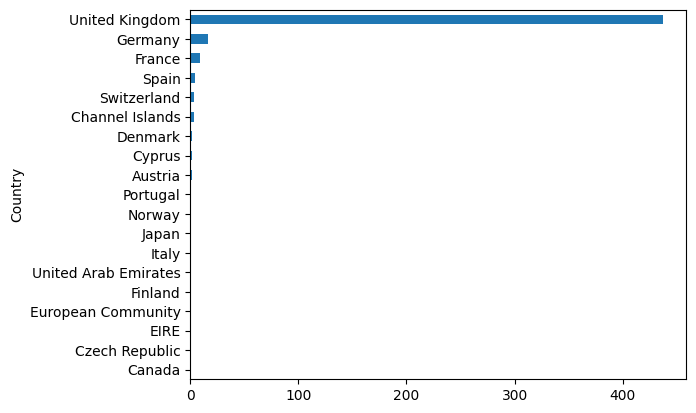

In [71]:
df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=True).plot.barh()

---
### (Q-07) จงแสดงจำนวน invoice ในแต่ละวันในสัปดาห์ ในรูปกราฟแท่ง

hint
- ลองค้นหาด้วย "pandas dayofweek"

In [72]:
df['dayofweek'] = df['InvDate'].dt.dayofweek

<Axes: xlabel='dayofweek'>

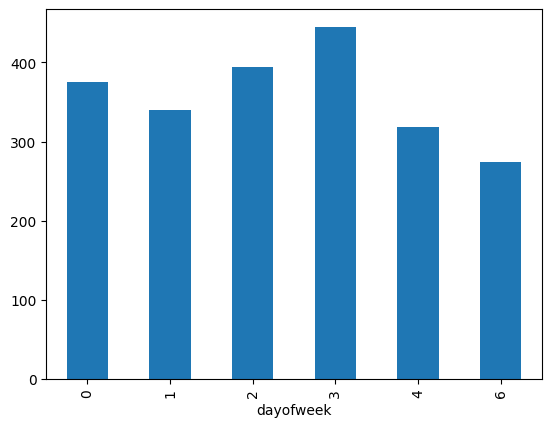

In [76]:
df.groupby('dayofweek')['InvoiceNo'].nunique().plot.bar()

---
### (Q-08) จงแสดงจำนวนรายได้ในแต่ละเดือน ในรูปกราฟแท่ง

hint
- ลองค้นหาด้วย "pandas datetime strftime"
- ใช้รูปแบบ "%Y-%m"

In [91]:
df["Month"] = df['InvDate'].dt.strftime('%m')

<Axes: xlabel='Month'>

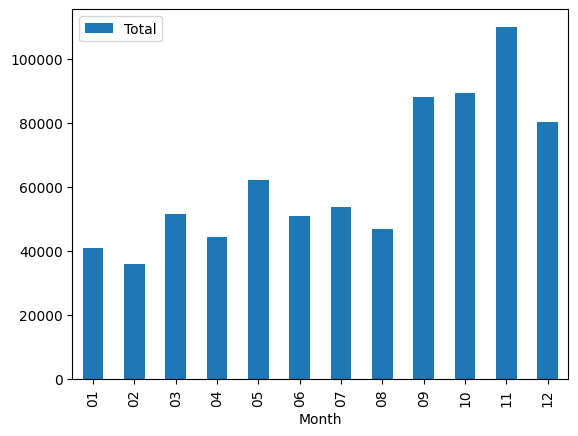

In [92]:
df.groupby("Month")['Total'].sum().to_frame().plot.bar()

---
### (Q-09) จงหา top 5 สินค้าใดขายดีในเดือน 12


In [103]:
df_dec = df[df["Month"] == '12']
df_dec.groupby("Description")["Quantity"].sum().sort_values(ascending=False).to_frame().head()

,Quantity
Description,
ASSORTED COLOUR BIRD ORNAMENT,386
WORLD WAR 2 GLIDERS ASSTD DESIGNS,339
PAPER CHAIN KIT 50'S CHRISTMAS,323
PAPER CHAIN KIT VINTAGE CHRISTMAS,314
PACK OF 72 RETROSPOT CAKE CASES,298


---
### (Q-10) จงหา top 5 สินค้าประเภทไม้ที่ขายได้ดีในเดือน 12

hint
- มีคำว่า "WOODEN"
- ลองค้นหาด้วยคำว่า "pandas string contains"

In [104]:
df_dec = df_dec[df_dec['Description'].str.contains('WOODEN')]
df_dec.groupby("Description")["Quantity"].sum().sort_values(ascending=False).to_frame().head()

,Quantity
Description,
WOODEN HEART CHRISTMAS SCANDINAVIAN,122
WOODEN STAR CHRISTMAS SCANDINAVIAN,116
WOODEN BOX OF DOMINOES,111
SWALLOW WOODEN CHRISTMAS DECORATION,61
PEACE WOODEN BLOCK LETTERS,58


---
### (Q-11) สินค้าที่มีคำว่า CHRISTMAS ขายได้ดีที่สุดในเดือนใด

In [108]:
df_chris = df[df['Description'].str.contains('CHRISTMAS')]
df_chris.groupby('Month')['Quantity'].sum().sort_values(ascending=False).to_frame().head(1)

,Quantity
Month,
11,9086


---
### (Q-12) ลูกค้าคนใดบ้างที่ซื้อสินค้าแทบทุกเดือน

hint
- groupby ลูกค้า, เดือน แล้ว count
- groupby ลูกค้า แล้ว count
- เรียงจากมากไปน้อย
- เลือกลูกค้าที่มีคะแนนสูงสุด (อาจจะมีหลายคน)

In [137]:
df_customer_month = df.groupby(['CustomerID', 'Month'])['InvoiceNo'].nunique()
df_customer_month

CustomerID  Month
12365.0     02       1
12370.0     03       1
            10       1
            12       2
12398.0     10       1
                    ..
18259.0     09       1
            11       1
            12       1
18261.0     09       1
            10       1
Name: InvoiceNo, Length: 1391, dtype: int64

In [140]:
df_customer_month = df_customer_month.reset_index()

In [147]:
df_customer_month.groupby('CustomerID')['Month'].nunique().sort_values(ascending=False).to_frame()

,Month
CustomerID,
18109.0,12
13408.0,12
14796.0,12
14606.0,12
14911.0,12
...,...
13976.0,1
16545.0,1
13937.0,1


In [168]:
df_res = df_customer_month.groupby('CustomerID')['Month'].nunique().sort_values(ascending=False).to_frame()
df_res = df_res[df_res['Month'] == 12]
df_res

,Month
CustomerID,
18109.0,12
13408.0,12
14796.0,12
14606.0,12
14911.0,12
13319.0,12


---
### (Q-13) จงจัดกลุ่มลูกค้าตามจำนวน invoice และราคาในการซื้อสินค้า ของแต่ละคน

hint 😵

In [195]:
customer_data = df.groupby('CustomerID')[['InvoiceNo', 'Total']].agg({'InvoiceNo': 'nunique', 'Total': 'sum'})
customer_data

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['InvoiceNo', 'Total']])

print(customer_data[customer_data['Cluster'] == 1])

            InvoiceNo      Total  Cluster
CustomerID                               
14911.0           197  119469.48        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(





---
https://rathachai.creatier.pro/

## つづく
